In [117]:
import pandas as pd
import numpy as np
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data sets
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

In [3]:
#Viewing actual_duration data set
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [119]:
#Determine whether there are missing values

ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [4]:
#Viewing appointments_regional.csv data set
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [120]:
#Determine whether there are missing values

ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [5]:
#Viewing national_catagories data set
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [121]:
#Determine whether there are missing values

nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
year                     0
month                    0
dtype: int64

In [6]:
# Selecting few columns.
Locations = pd.read_excel('national_categories.xlsx', 
                            usecols=['sub_icb_location_name'])

# Print the DataFrame.
Locations.head()

,sub_icb_location_name
0,NHS North East and North Cumbria ICB - 00L
1,NHS North East and North Cumbria ICB - 00L
2,NHS North East and North Cumbria ICB - 00L
3,NHS North East and North Cumbria ICB - 00L
4,NHS North East and North Cumbria ICB - 00L


In [7]:
#Determine the number of locations
Locations = nc['sub_icb_location_name'].value_counts()
Locations.count()

106

In [8]:
# What are the five location with highest number of record
nc['sub_icb_location_name'].value_counts(ascending = True)


NHS Greater Manchester ICB - 00V                2170
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS North East and North Cumbria ICB - 00N      4210
                                               ...  
NHS North East London ICB - A3A8R              11837
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS Devon ICB - 15N                            12526
NHS Kent and Medway ICB - 91Q                  12637
NHS North West London ICB - W2U3Z              13007
Name: sub_icb_location_name, Length: 106, dtype: int64

In [9]:
#Number of service stations,context type and national_category

## Selecting few columns.
Locations = pd.read_excel('national_categories.xlsx', 
                            usecols=['service_setting','context_type','national_category'])
# Print the DataFrame.
Locations.head()

,service_setting,context_type,national_category
0,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round
1,Other,Care Related Encounter,Planned Clinics
2,General Practice,Care Related Encounter,Home Visit
3,General Practice,Care Related Encounter,General Consultation Acute
4,General Practice,Care Related Encounter,Structured Medication Review


In [10]:
#Number of service setting
Locations = nc['service_setting'].value_counts()
Locations.count()

5

In [11]:
#Number of context type
Locations = nc['context_type'].value_counts()
Locations.count()


3

In [12]:
#Number of national category
Locations = nc['national_category'].value_counts()
Locations.count()

18

In [13]:
#Number of appointment status
# Selecting few columns.
appointment_status = pd.read_csv('appointments_regional.csv', 
                            usecols=['appointment_status'])

# Print the DataFrame.
appointment_status.head()

,appointment_status
0,Attended
1,Attended
2,Attended
3,Attended
4,Attended


In [14]:
#Number of appointment status
appointment_status = ar['appointment_status'].value_counts()
appointment_status.count()

3

Week 3: Assigment Analyse the data

In [15]:
#Read the data sets
ad = pd.read_csv('actual_duration.csv')


In [16]:
#Viewing actual_duration data set
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [17]:
# converting the string to# Import modules and classes.

# Import modules and classes.
# Import the datetime module and datetime class.
from datetime import datetime

ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
 
# printing dataframe
ad.head()
 
print(ad.dtypes)

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [18]:
#Print dataframe after changing to datetime format

ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [19]:
#Use of maximum function
ad['appointment_date'].max()

Timestamp('2022-06-30 00:00:00')

In [20]:
#Use of minimum function
ad['appointment_date'].min()

Timestamp('2021-12-01 00:00:00')

In [21]:
nc = pd.read_excel('national_categories.xlsx')
#view
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [22]:
# converting the string to# Import modules and classes.

# Import modules and classes.
# Import the datetime module and datetime class.
from datetime import datetime

nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])
 
# printing dataframe
nc.head()
 
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [23]:
#Print dataframe after changing to datetime format

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [24]:
#Use of maximum function
nc['appointment_date'].max()

Timestamp('2022-06-30 00:00:00')

In [25]:
#Use of minimum function
nc['appointment_date'].min()

Timestamp('2021-08-01 00:00:00')

In [26]:
#Use loc function to create a subset 
nc_sub = nc[['service_setting','sub_icb_location_name','appointment_date']]
nc_sub2 = nc_sub.loc[nc_sub['sub_icb_location_name']=='NHS North West London ICB - W2U3Z']
nc_sub3 = nc_sub2[(nc_sub2['appointment_date']>='2022-01-01') &(nc_sub2['appointment_date']<='2022-06-01')]

#view the output
print (nc_sub3['service_setting'].value_counts())

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64


In [27]:
nc['year']=pd.to_datetime(nc['appointment_month']).dt.year
nc['month']=pd.to_datetime(nc['appointment_month']).dt.month


#view
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,year,month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08,2021,8
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08,2021,8
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08,2021,8
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08,2021,8
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08,2021,8
...,...,...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06,2022,6
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06,2022,6
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06,2022,6
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06,2022,6


In [28]:
#groupby function used to obtain the count of appointments per month
transaction_groupby_obj = nc.groupby(['year','month'])
transaction_groupby_obj.agg({'count_of_appointments':['sum']})

count_of_appointments
                             sum
year month                      
2021 8                  23852171
     9                  28522501
     10                 30303834
     11                 30405070
     12                 25140776
2022 1                  25635474
     2                  25355260
     3                  29595038
     4                  23913060
     5                  27495508
     6                  25828078

In [152]:
#The month with highest appointments
transaction_groupby_stock_code_obj = nc.groupby('month')
transaction_groupby_stock_code_obj.agg({'count_of_appointments':['sum']}).sort_values(by=('count_of_appointments','sum'),ascending=False)



,count_of_appointments
,sum
month,
11,30405070
10,30303834
3,29595038
9,28522501
5,27495508
6,25828078
1,25635474
2,25355260


#Assigment week 4

In [30]:
# Change the data type of the appointment month to string to allow for easier plotting
df = nc.astype({'appointment_month':'string'})
print(df.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                string
year                              int64
month                             int64
dtype: object


In [31]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [32]:
## Aggregate on monthly level and determine the sum of records per month.

#Create a new dataframe and group by service setting
#Sorting the service setting month-wise

nc_ss = nc[['service_setting','month','count_of_appointments']]
nc_ss_sum = nc_ss.groupby(['month','service_setting'])[['count_of_appointments']].sum()

#view the output
nc_ss_sum

count_of_appointments
month service_setting                                 
1     Extended Access Provision                 186375
      General Practice                        23583053
      Other                                     457440
      Primary Care Network                      569044
      Unmapped                                  839562
2     Extended Access Provision                 196627
      General Practice                        23305934
      Other                                     456153
      Primary Care Network                      585300
      Unmapped                                  811246
3     Extended Access Provision                 231905
      General Practice                        27187368
      Other                                     530677
      Primary Care Network                      702176
      Unmapped                                  942912
4     Extended Access Provision                 192284
      General Practice                        21916791
      Other                                     437402
      Primary Care Network                      606270
      Unmapped                                  760313
5     Extended Access Provision                 220511
      General Practice                        25238620
      Other                                     503327
      Primary Care Network                      712280
      Unmapped                                  820770
6     Extended Access Provision                 209652
      General Practice                        23680374
      Other                                     478813
      Primary Care Network                      700599
      Unmapped                                  758640
8     Extended Access Provision                 160927
      General Practice                        21575852
      Other                                     449101
      Primary Care Network                      432448
      Unmapped                                 1233843
9     Extended Access Provision                 187906
      General Practice                        25940821
      Other                                     527174
      Primary Care Network                      530485
      Unmapped                                 1336115
10    Extended Access Provision                 209539
      General Practice                        27606171
      Other                                     556487
      Primary Care Network                      564981
      Unmapped                                 1366656
11    Extended Access Provision                 207577
      General Practice                        27767889
      Other                                     558784
      Primary Care Network                      614324
      Unmapped                                 1256496
12    Extended Access Provision                 173504
      General Practice                        23008818
      Other                                     464718
      Primary Care Network                      539479
      Unmapped                                  954257

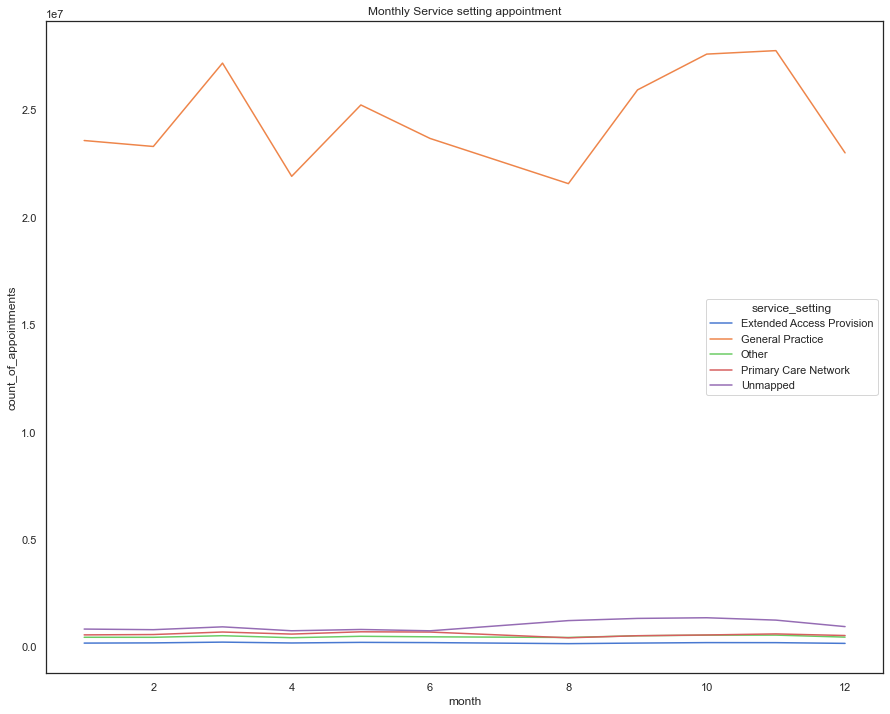

In [33]:
# Create a simple lineplot.
sns.lineplot(x='month', y='count_of_appointments', data=nc_ss_sum,ci=None,palette='muted',hue='service_setting').set(title='Monthly Service setting appointment')
sns.set(rc={'figure.figsize':(17,7.5)})


In [34]:
#Create a new dataframe and group by context type
#Sorting the context type month-wise
nc_ct = nc[['context_type','month','count_of_appointments']]
nc_ct_sum = nc_ct.groupby(['month','context_type'])[['count_of_appointments']].sum()

#view the output
nc_ct_sum


count_of_appointments
month context_type                                 
1     Care Related Encounter               22441947
      Inconsistent Mapping                  2353965
      Unmapped                               839562
2     Care Related Encounter               22211021
      Inconsistent Mapping                  2332993
      Unmapped                               811246
3     Care Related Encounter               25928850
      Inconsistent Mapping                  2723276
      Unmapped                               942912
4     Care Related Encounter               20904193
      Inconsistent Mapping                  2248554
      Unmapped                               760313
5     Care Related Encounter               24101243
      Inconsistent Mapping                  2573495
      Unmapped                               820770
6     Care Related Encounter               22621827
      Inconsistent Mapping                  2447611
      Unmapped                               758640
8     Care Related Encounter               20255235
      Inconsistent Mapping                  2363093
      Unmapped                              1233843
9     Care Related Encounter               24404251
      Inconsistent Mapping                  2782135
      Unmapped                              1336115
10    Care Related Encounter               26125201
      Inconsistent Mapping                  2811977
      Unmapped                              1366656
11    Care Related Encounter               26282778
      Inconsistent Mapping                  2865796
      Unmapped                              1256496
12    Care Related Encounter               21798612
      Inconsistent Mapping                  2387907
      Unmapped                               954257

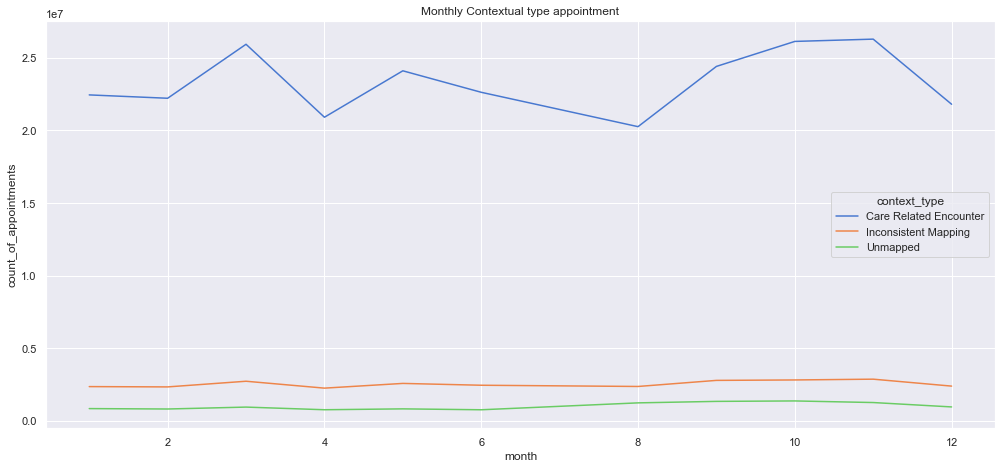

In [35]:
# Create a simple lineplot.
sns.lineplot(x='month', y='count_of_appointments', data=nc_ct_sum,ci=None,palette='muted',hue='context_type').set(title='Monthly Contextual type appointment')
sns.set(rc={'figure.figsize':(17,7.5)})

In [36]:
#Create a new dataframe and group by national category
#Sorting the national category type month-wise
nc_nc = nc[['national_category','month','count_of_appointments']]
nc_nc_sum = nc_nc.groupby(['month','national_category'])[['count_of_appointments']].sum()

#view the output
nc_nc_sum

count_of_appointments
month national_category                                                        
1     Care Home Needs Assessment & Personalised Care ...                  37988
      Care Home Visit                                                     55860
      Clinical Triage                                                   3777487
      General Consultation Acute                                        4787643
      General Consultation Routine                                      8645563
...                                                                         ...
12    Social Prescribing Service                                          36120
      Structured Medication Review                                       153503
      Unmapped                                                           954257
      Unplanned Clinical Activity                                        275381
      Walk-in                                                             35197

[198 rows x 1 columns]

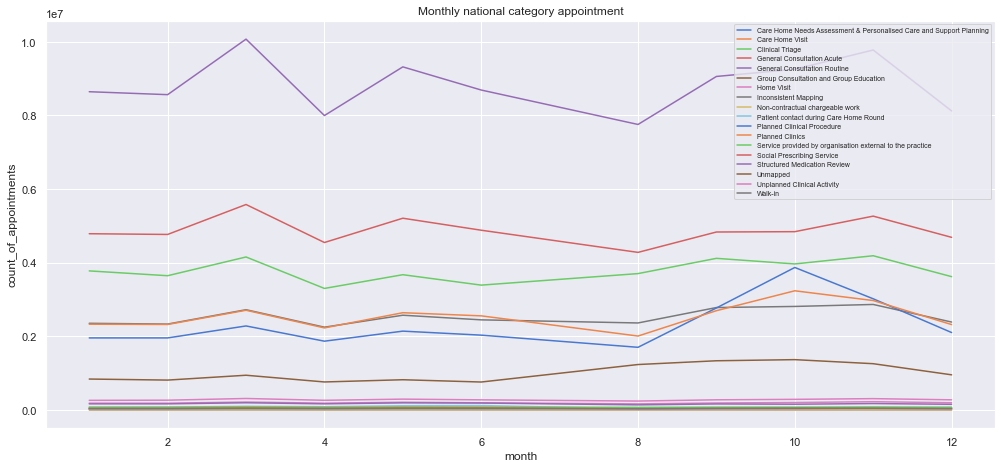

In [253]:
# Create a simple lineplot.
sns.lineplot(x='month', y='count_of_appointments', data=nc_nc_sum,ci=None,palette='muted',hue='national_category').set(title='Monthly national category appointment')
sns.set(rc={'figure.figsize':(15,12)})
plt.legend(fontsize='xx-small',title_fontsize='20',loc='upper right')

Summer (August 2021):

In [105]:
nc_ss_summer=nc[['appointment_date','service_setting','count_of_appointments']]
nc_ss_summer1= nc_ss_summer.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()

nc_ss_summer1.reset_index(inplace=True)
new_condition = (nc_ss_summer1['appointment_date']>= '2021-08-01') & (nc_ss_summer1['appointment_date']<= '2021-08-31')
new_df=nc_ss_summer1.loc[new_condition]

#view the output
new_df




,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054
...,...,...,...
150,2021-08-31,Extended Access Provision,8281
151,2021-08-31,General Practice,1125584
152,2021-08-31,Other,23181
153,2021-08-31,Primary Care Network,21789


[Text(0.5, 1.0, 'Summer days service setting ')]

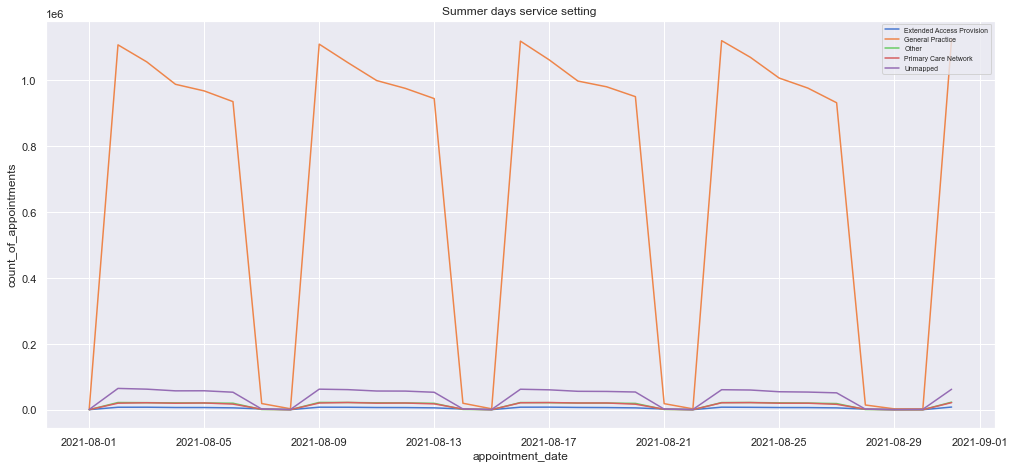

In [106]:
# Create a simple lineplot.
c= sns.lineplot(x='appointment_date', y='count_of_appointments', data=new_df,ci=None,palette='muted',hue='service_setting').set(title='Summer days service setting ')
sns.set(rc={'figure.figsize':(17,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='20',loc='upper right')

#view the output
c

Autumn days (October 2021)

In [107]:
nc_ss_autumn=nc[['appointment_date','service_setting','count_of_appointments']]
nc_ss_autumn1= nc_ss_autumn.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()
nc_ss_autumn1.reset_index(inplace=True)
new_condition = (nc_ss_autumn1['appointment_date']>= '2021-10-01') & (nc_ss_autumn1['appointment_date']<= '2021-10-31')
new_df=nc_ss_autumn1.loc[new_condition]

#view the output
new_df

,appointment_date,service_setting,count_of_appointments
305,2021-10-01,Extended Access Provision,7107
306,2021-10-01,General Practice,1130646
307,2021-10-01,Other,22639
308,2021-10-01,Primary Care Network,22974
309,2021-10-01,Unmapped,56201
...,...,...,...
455,2021-10-31,Extended Access Provision,1113
456,2021-10-31,General Practice,17449
457,2021-10-31,Other,1147
458,2021-10-31,Primary Care Network,1200


[Text(0.5, 1.0, 'Autumn days service setting ')]

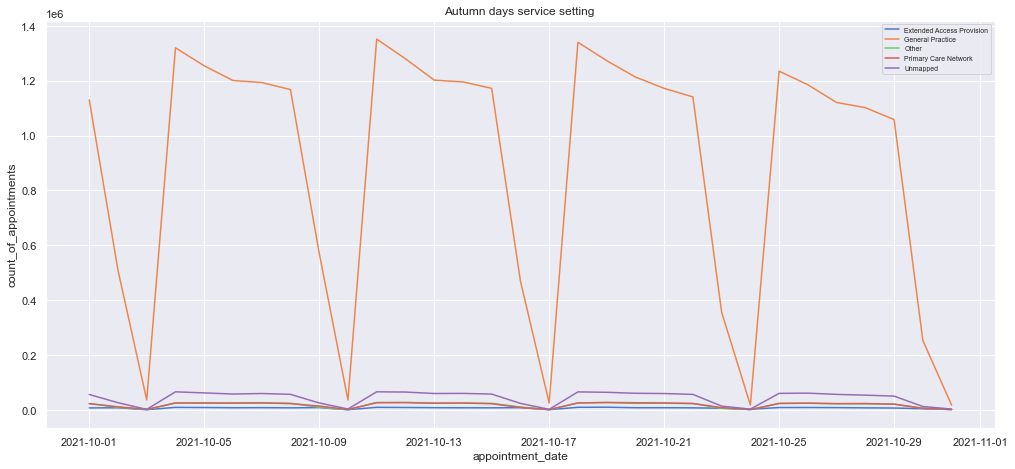

In [110]:
# Create a simple lineplot.
y=sns.lineplot(x='appointment_date', y='count_of_appointments', data=new_df,ci=None,palette='muted',hue='service_setting').set(title='Autumn days service setting ')
sns.set(rc={'figure.figsize':(17,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='20',loc='upper right')

#view the output
y

Winter days(January 2022)

In [111]:
nc_ss_winter=nc[['appointment_date','service_setting','count_of_appointments']]
nc_ss_winter1= nc_ss_winter.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()
nc_ss_winter1.reset_index(inplace=True)
new_condition = (nc_ss_winter1['appointment_date']>= '2022-01-01') & (nc_ss_winter1['appointment_date']<= '2022-01-31')
new_df=nc_ss_winter1.loc[new_condition]


#view the output
new_df

,appointment_date,service_setting,count_of_appointments
765,2022-01-01,Extended Access Provision,246
766,2022-01-01,General Practice,3578
767,2022-01-01,Other,280
768,2022-01-01,Primary Care Network,215
769,2022-01-01,Unmapped,572
...,...,...,...
915,2022-01-31,Extended Access Provision,9962
916,2022-01-31,General Practice,1305082
917,2022-01-31,Other,25034
918,2022-01-31,Primary Care Network,30509


[Text(0.5, 1.0, 'Winter days service setting ')]

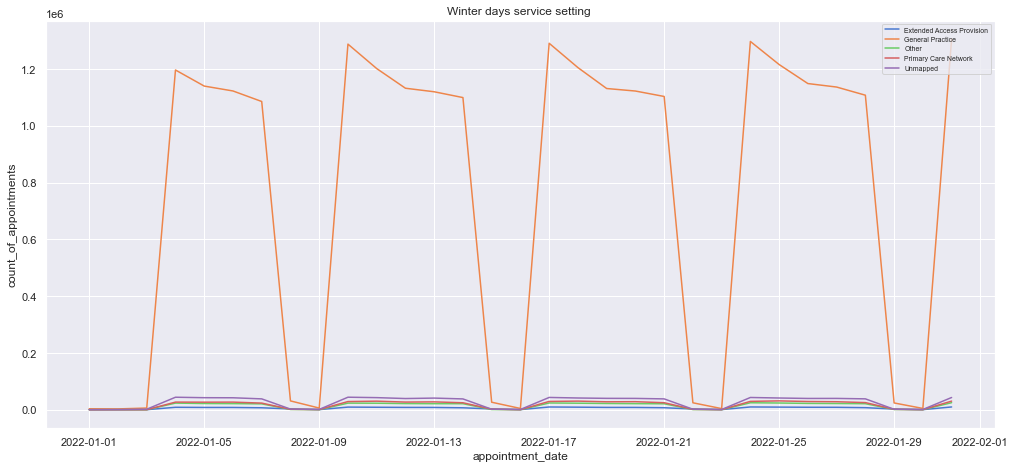

In [112]:
# Create a simple lineplot.
x=sns.lineplot(x='appointment_date', y='count_of_appointments', data=new_df,ci=None,palette='muted',hue='service_setting').set(title='Winter days service setting ')
sns.set(rc={'figure.figsize':(17,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='20',loc='upper right')

#view the output
x

Spring(April 2022)

In [113]:
nc_ss_spring=nc[['appointment_date','service_setting','count_of_appointments']]
nc_ss_spring1= nc_ss_winter.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()
nc_ss_spring1.reset_index(inplace=True)
new_condition = (nc_ss_spring1['appointment_date']>= '2022-04-01') & (nc_ss_winter1['appointment_date']<= '2022-04-30')
new_df=nc_ss_spring1.loc[new_condition]


#view the output
new_df

,appointment_date,service_setting,count_of_appointments
1215,2022-04-01,Extended Access Provision,8011
1216,2022-04-01,General Practice,1085037
1217,2022-04-01,Other,21077
1218,2022-04-01,Primary Care Network,26493
1219,2022-04-01,Unmapped,36836
...,...,...,...
1360,2022-04-30,Extended Access Provision,3416
1361,2022-04-30,General Practice,23675
1362,2022-04-30,Other,1148
1363,2022-04-30,Primary Care Network,3150


[Text(0.5, 1.0, 'Spring days service setting ')]

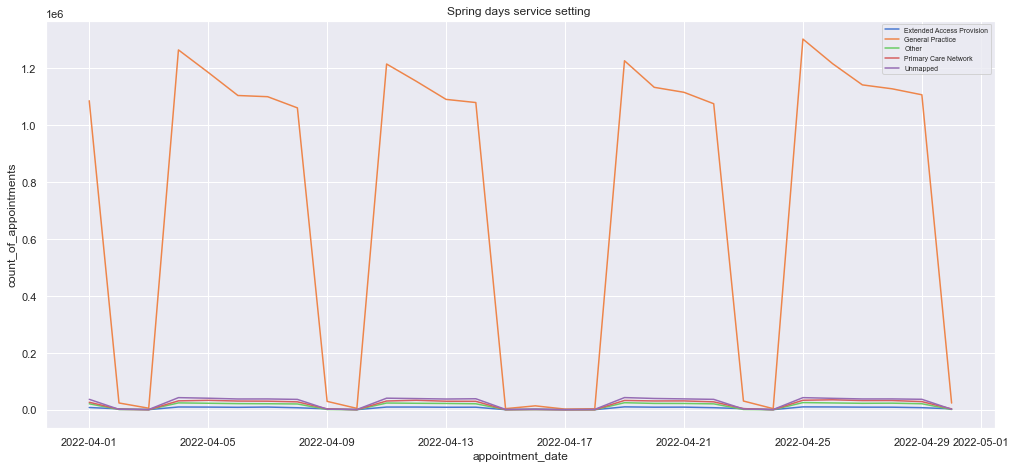

In [114]:
# Create a simple lineplot.
x=sns.lineplot(x='appointment_date', y='count_of_appointments', data=new_df,ci=None,palette='muted',hue='service_setting').set(title='Spring days service setting ')
sns.set(rc={'figure.figsize':(17,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='20',loc='upper right')

#view the output
x

Assignment week 5

In [50]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [51]:
#View new data frame

tweets=pd.read_csv('tweets.csv')

#view the output
tweets.head(5)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [52]:
# Explore the metadata.

# Selecting few columns.
tweets_count = pd.read_csv('tweets.csv', 
                            usecols=['tweet_retweet_count','tweet_favorite_count'])

# Print the DataFrame.
tweets_count.value_counts()

tweet_retweet_count  tweet_favorite_count
0                    0                       436
1                    0                       189
2                    0                       100
0                    1                        70
3                    0                        62
                                            ... 
9                    5                         1
12                   42                        1
13                   0                         1
14                   0                         1
303                  0                         1
Length: 79, dtype: int64

In [53]:
tweets_text=pd.read_csv('tweets.csv', 
                            usecols=['tweet_entities_hashtags'])
#view the output
tweets_text


,tweet_entities_hashtags
0,#Healthcare
1,"#PremiseHealth, #hiring"
2,#Healthcare
3,#NEW
4,"#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare"
...,...
1169,"#Innovation, #precisionFabrication, #Microfluidic"
1170,"#SKPoli, #healthcare"
1171,"#webinar, #ESG, #healthcare"
1172,"#bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu"


In [54]:
# Change the data type of the tweets to string
df = tweets_text.astype({'tweet_entities_hashtags':'string'})
print(df.dtypes)

tweet_entities_hashtags    string
dtype: object


In [55]:
tags=[]
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
#view the output
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [56]:
#Create a panda series to count the values in the list
hashtags = pd.Series(tags).value_counts()

In [57]:
#Display the first 30 records
hashtags.iloc[:30]

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [58]:
# Convert the series to a DataFrame in preparation for visualisation.

data=pd.DataFrame(hashtags).reset_index()

#View the output
data

,index,0
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [59]:
#Renaming colums
data.rename(columns={data.columns[0]:'word',data.columns[1]:'count'},inplace = True)
            
#view the output
data

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [60]:
# Change the data type of the tweets to string
df = data.astype({'count':'int',})
print(df.dtypes)

word     object
count     int32
dtype: object


In [61]:
#Display records where count is larger then 10
filtered_df = data.query('count >= 10')


filtered_df


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
58,#saskatchewan,10
59,#nodejs,10
60,@ingliguori\n\n#python,10
61,#data,10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


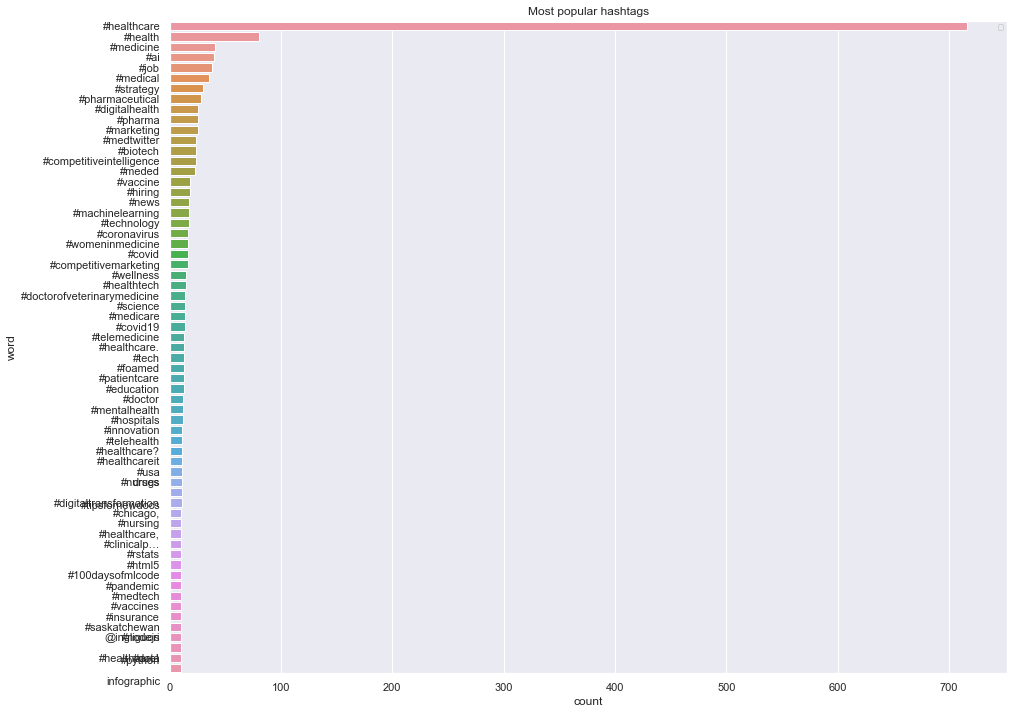

In [128]:
# Create a Seaborn barplot indicating records with a count >10 records.
# Create a barplot.
sns.barplot(x='count', y='word',ci=None,data=filtered_df).set(title='Most popular hashtags')
sns.set(rc={'figure.figsize':(15,12)})
plt.legend(fontsize='xx-small',title_fontsize='20',loc='upper right')



In [132]:
#Display records where count is larger then 10 but less than 41
filtered_df1 = data.query('count >= 10 &count<41')


filtered_df1

,word,count
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25
11,#medtwitter,24
12,#biotech,24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


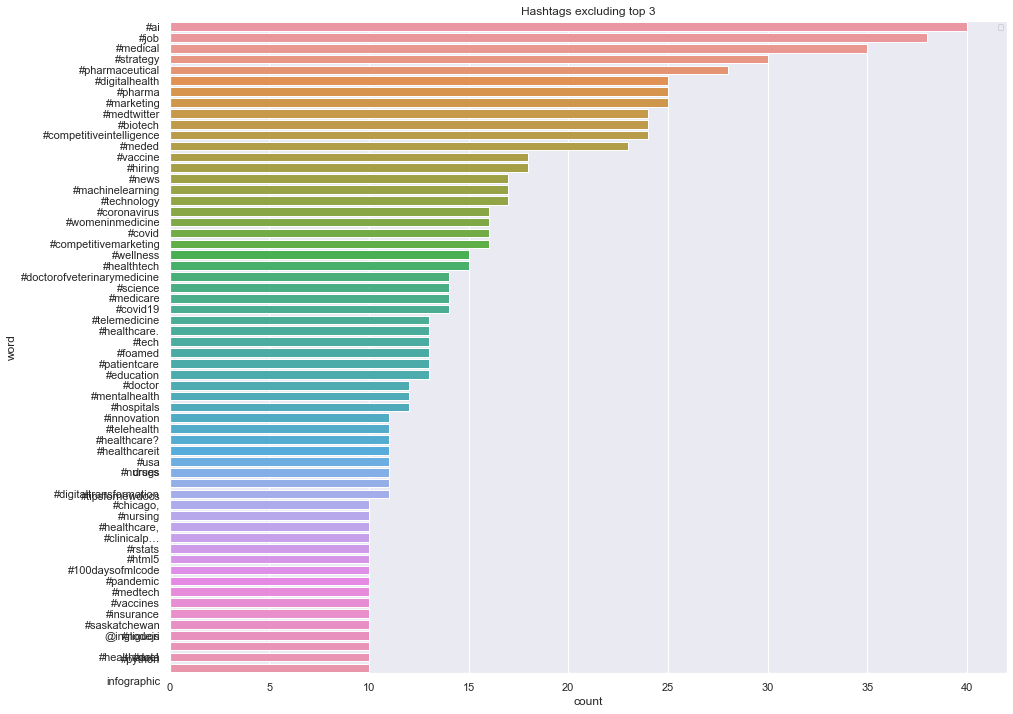

In [135]:
# Create a Seaborn barplot indicating records with a count >10 records.
# Create a barplot.
sns.barplot(x='count', y='word',ci=None,data=filtered_df1).set(title='Hashtags excluding top 3')
sns.set(rc={'figure.figsize':(15,12)})
plt.legend(fontsize='xx-small',title_fontsize='20',loc='upper right')



Assignment activity 6

Investigate the main cencerns posed by the NHS.

In [63]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head(5)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [64]:
#Use of maximum function
ar['appointment_month'].max()

'2022-06'

In [65]:
#Use of maximum function
ar['appointment_month'].min()

'2020-01'

In [165]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_sub=ar[['appointment_month','count_of_appointments','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment',]]
ar_sub1= ar_sub.groupby(['appointment_month'])[['count_of_appointments']].sum()

ar_sub1.reset_index(inplace=True)
new_condition = (ar_sub1['appointment_month']>= '2021-08') & (ar_sub1['appointment_month']<= '2022-06')
new_df=ar_sub1.loc[new_condition]

#view the output
new_df

,appointment_month,count_of_appointments
19,2021-08,23852171
20,2021-09,28522501
21,2021-10,30303834
22,2021-11,30405070
23,2021-12,25140776
24,2022-01,25635474
25,2022-02,25355260
26,2022-03,29595038
27,2022-04,23913060
28,2022-05,27495508


Question 1: Should the NHS start looking at increasing staff levels?

In [227]:
# Create an aggregated data set to review the different features.

ar_agg=ar[['appointment_month','hcp_type','appointment_status','appointment_mode','count_of_appointments','time_between_book_and_appointment',]]
ar_agg_sum=ar_agg.groupby(['appointment_month','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()
new_condition = (ar_agg_sum['appointment_month']>= '2021-08') & (ar_agg_sum['appointment_month']<= '2022-06')
ar_agg_sum1=ar_agg_sum.loc[new_condition]
# View the DataFrame
ar_agg_sum1

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
6385,2021-08,GP,Attended,Face-to-Face,1 Day,507835
6386,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
6387,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
6388,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
6389,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
10134,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
10135,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
10136,2022-06,Unknown,Unknown,Unknown,Same Day,1914
10137,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [202]:
#Create a new data frame

ar_df=ar[['appointment_month','count_of_appointments']]
ar_df1=ar_df.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()
new_condition = (ar_df1['appointment_month']>= '2021-08') & (ar_df1['appointment_month']<= '2022-06')
ar_df1_sum1=ar_df1.loc[new_condition]
df_new = ar_df1_sum1.assign(utilisation=lambda x:x.count_of_appointments/ 30)
df_new1=df_new.round(1)

#view the dataframe
df_new1

,appointment_month,count_of_appointments,utilisation
19,2021-08,23852171,795072.4
20,2021-09,28522501,950750.0
21,2021-10,30303834,1010127.8
22,2021-11,30405070,1013502.3
23,2021-12,25140776,838025.9
24,2022-01,25635474,854515.8
25,2022-02,25355260,845175.3
26,2022-03,29595038,986501.3
27,2022-04,23913060,797102.0
28,2022-05,27495508,916516.9


In [188]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
# Change the data type of the appointment_month to string
df = ar_agg_sum1.astype({'appointment_month':'string'})
print(df.dtypes)


appointment_month        string
hcp_type                 object
appointment_status       object
count_of_appointments     int64
dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'Count of monthly visits ')]

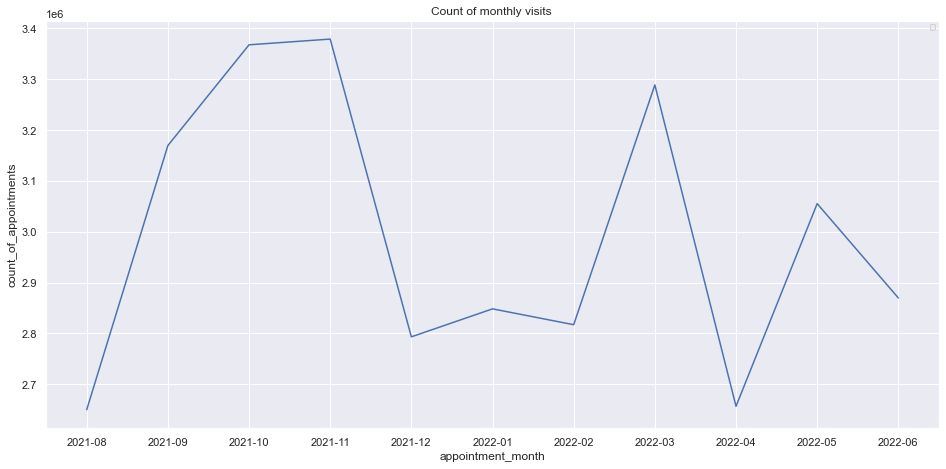

In [189]:
# Create a simple lineplot for count of appointments
x=sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg_sum1,ci=None,palette='muted').set(title='Count of monthly visits ')
sns.set(rc={'figure.figsize':(15,12)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
x

In [190]:
# Convert the appointment_month to string data type for ease of visualisation.
# Change the data type of the appointment_month to string
df = ar_df1_sum1.astype({'appointment_month':'string'})
print(df.dtypes)


appointment_month        string
count_of_appointments     int64
dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'Utilisation ')]

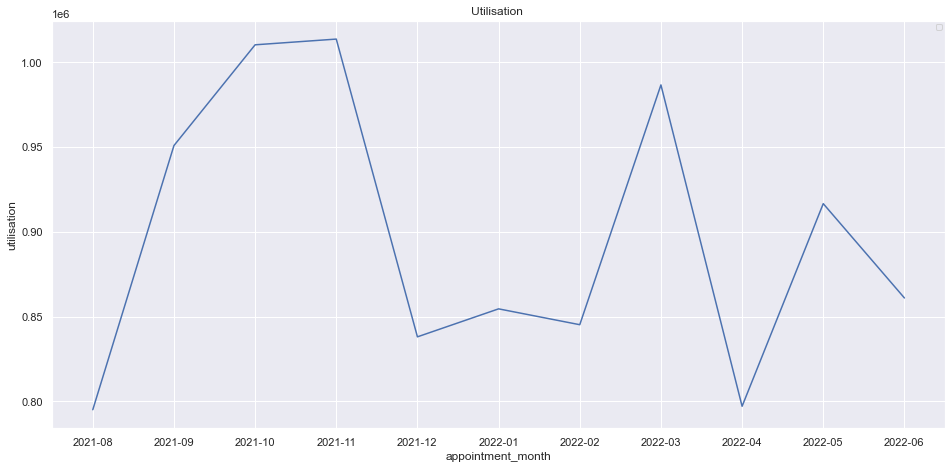

In [198]:
# Create a simple lineplot for count of appointments
y=sns.lineplot(x='appointment_month', y='utilisation', data=df_new1,ci=None,palette='muted').set(title='Utilisation ')
sns.set(rc={'figure.figsize':(16,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
y

Question 2: How do the healthcare professional types differ over time?

[Text(0.5, 1.0, 'Types of healthcare professionals')]

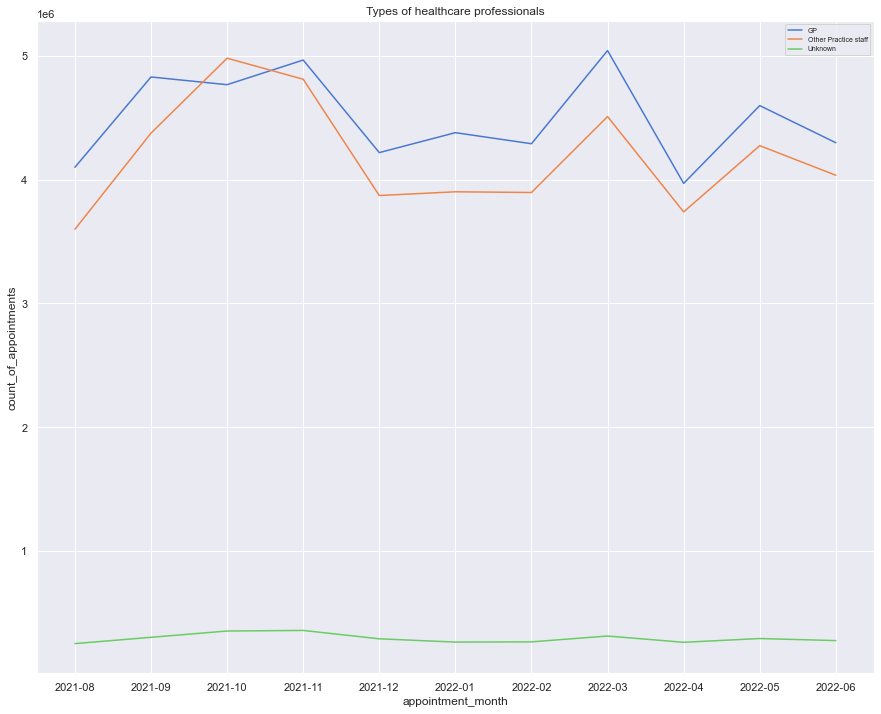

In [175]:
# Create a simple lineplot for count of appointments
y=sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg_sum1,ci=None,palette='muted',hue='hcp_type').set(title='Types of healthcare professionals')
sns.set(rc={'figure.figsize':(16,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
y

Question 3: Are there significant changes in whether or not visits are attended?

[Text(0.5, 1.0, 'Significant changes based on attendance')]

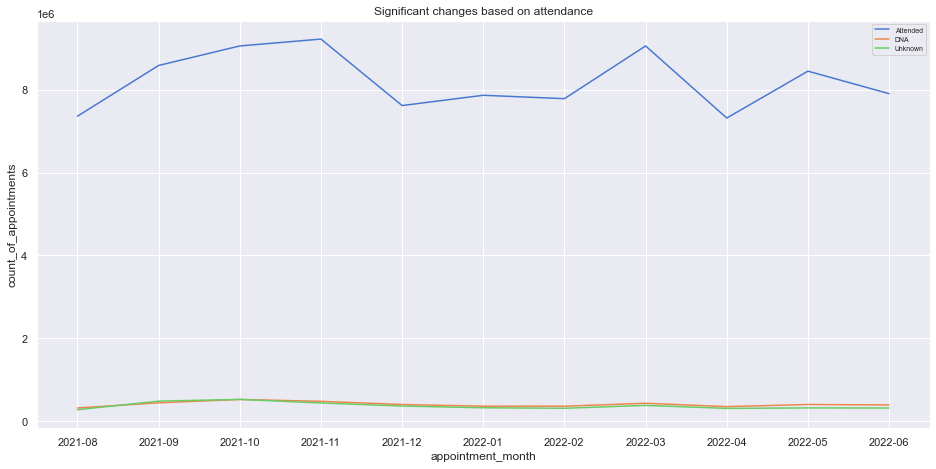

In [186]:
# Create a line plot to answer the question.
y=sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg_sum1,ci=None,palette='muted',hue='appointment_status').set(title='Significant changes based on attendance')
sns.set(rc={'figure.figsize':(16,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
y

Question 4: Are there changes in terms of appointment type and the busiest months

[Text(0.5, 1.0, 'Significant changes based on busiest month')]

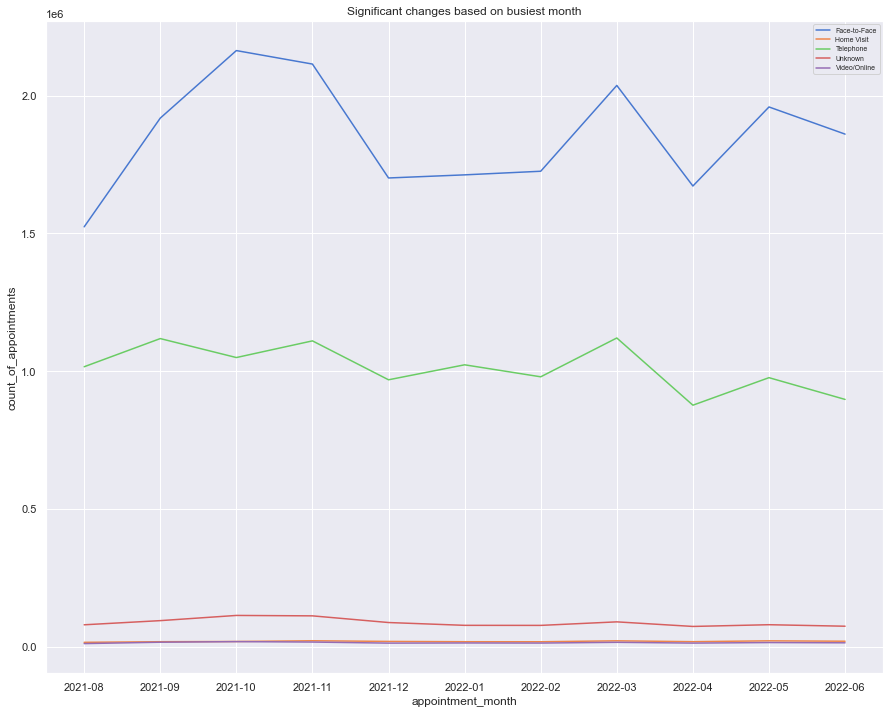

In [192]:
# Create a line plot to answer the question

y=sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg_sum1,ci=None,palette='muted',hue='appointment_mode').set(title='Significant changes based on busiest month')
sns.set(rc={'figure.figsize':(16,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
y



Question 5: Are there any trends in time between booking an appointment?

[Text(0.5, 1.0, 'Trends between booking and appointment')]

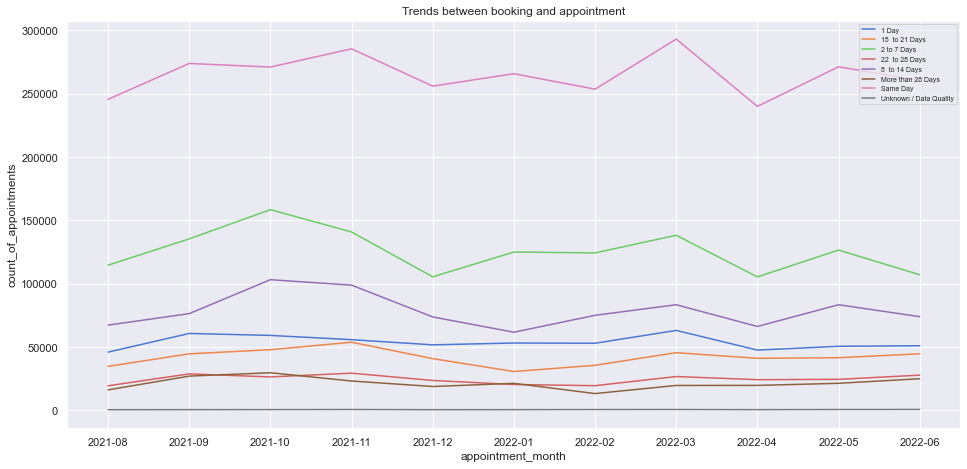

In [228]:
# Create a line plot to answer the question

y=sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg_sum1,ci=None,palette='muted',hue='time_between_book_and_appointment').set(title='Trends between booking and appointment')
sns.set(rc={'figure.figsize':(16,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
y

Question 6: How do the spread of service settings compare?

In [211]:
#View the nc database
nc = pd.read_excel('national_categories.xlsx')
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [213]:
nc_df=nc[['appointment_month','count_of_appointments','service_setting']]
nc_df1=nc_df.groupby(['appointment_month','service_setting',])['count_of_appointments'].sum().reset_index()
new_condition = (nc_df1['appointment_month']>= '2021-08') & (nc_df1['appointment_month']<= '2022-06')
nc_df1_sum1=nc_df1.loc[new_condition]

#view the dataframe
nc_df1_sum1

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'monthly service settings')]

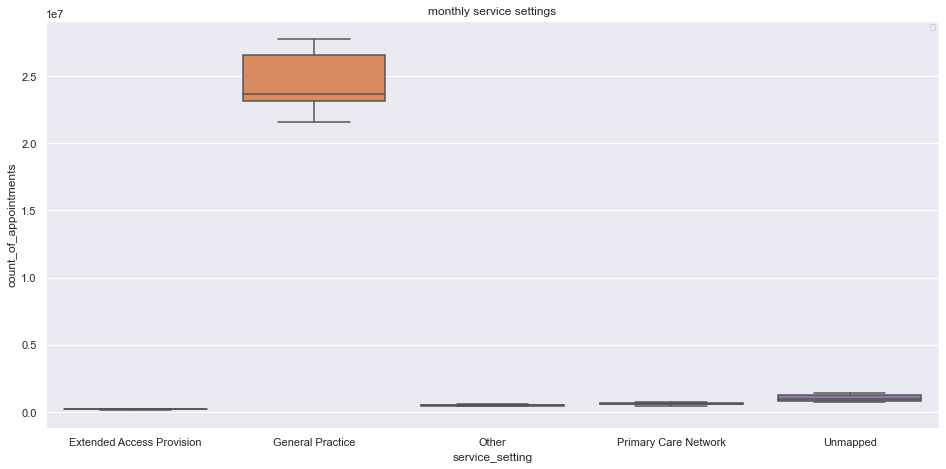

In [251]:
# Create a line plot to answer the question

y=sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_df1_sum1,palette='muted',).set(title='monthly service settings')
sns.set(rc={'figure.figsize':(16,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
y


In [255]:
#Display excluding GP

new_df_2=nc_df1_sum1[nc_df1_sum1['service_setting'] != "General Practice"]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'monthly service settings')]

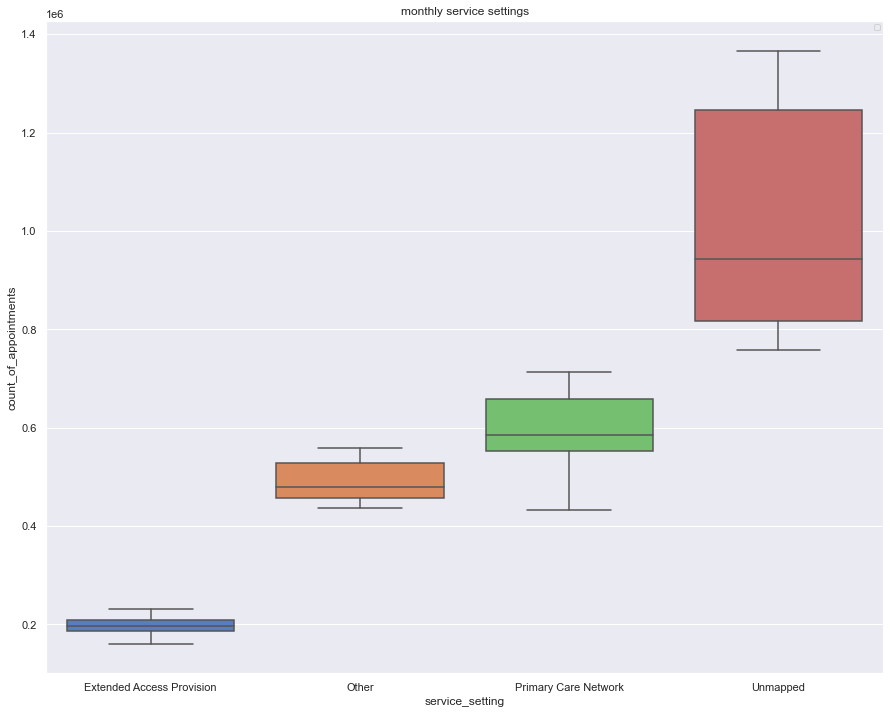

In [256]:
# Create a line plot to answer the question

y=sns.boxplot(x='service_setting', y='count_of_appointments', data=new_df_2,palette='muted',).set(title='monthly service settings')
sns.set(rc={'figure.figsize':(16,7.5)})
plt.legend(fontsize='xx-small',title_fontsize='10',loc='upper right')

#view the output
y